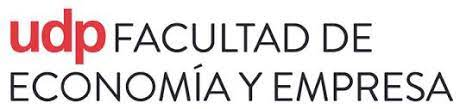



# UDP - Bussines Analytics 1

### Contenido de la clase:

### Data Processing

### Contenido de la clase
* Creación de Variables Dummies
* One Hot Encoding
* Label Encoding
* Target Encoding
* Ejemplo práctico

## Hacia donde vamos...
* Analítica Descriptiva:
  * Preprocessing
    * Missing Values
    * Outliers
    * Feature Engineering
    * Feature Selection
  * Exploratory Data Analysis
    * Análisis Univariado: distribución normal?
    * Test de comparación de médias: t-test, Chi2, KS, etc
    * Regresión Logística

### Instalación de la librería de estadísticas

In [399]:
# Para instalarla debes sacar el signo #
# ! pip install scipy

In [400]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline
# apply some cool styling
sns.set(color_codes=True)

# Instalación de librería estadística
from scipy import stats
from scipy.stats import norm


# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


### Importamos la data desde nuestro Drive

1. from google.colab import drive
2. drive.mount("/content/drive")
3. Permitir acceso a nuestro Google Colab
4. link archivo


In [401]:
# from google.colab import drive
# drive.mount("/content/drive")
# df = pd.read_csv("/content/drive/MyDrive/UDP_BA01/data_store.csv",sep=",",encoding="latin-1")

# # To display the top 5 rows
# df.head(5)

In [402]:
# Data Local
df = pd.read_csv("/Users/franciscoletelier/Dropbox (Personal)/UDP/UDP_BA/data_store.csv",sep=",",encoding="latin-1")
df.sample(10)



# Data desde Github
# df = pd.read_csv("data_store.csv",sep=",",encoding="latin-1")
# df.sample(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6204,6205,CA-2017-145660,12/1/2017,12/3/2017,First Class,MG-17650,Matthew Grinstein,Home Office,United States,Marion,...,43302,East,FUR-FU-10002885,Furniture,Furnishings,Magna Visual Magnetic Picture Hangers,7.712,2,0.2,1.7352
4686,4687,CA-2016-159912,8/29/2016,9/3/2016,Standard Class,GB-14530,George Bell,Corporate,United States,Philadelphia,...,19120,East,OFF-FA-10000053,Office Supplies,Fasteners,Revere Boxed Rubber Bands by Revere,10.584,7,0.2,-2.3814
5513,5514,CA-2015-103177,5/30/2015,6/1/2015,First Class,EN-13780,Edward Nazzal,Consumer,United States,New York City,...,10009,East,TEC-PH-10001795,Technology,Phones,RCA H5401RE1 DECT 6.0 4-Line Cordless Handset ...,239.970,3,0.0,2.3997
6258,6259,CA-2015-133536,3/28/2015,3/30/2015,Second Class,JH-15820,John Huston,Consumer,United States,New York City,...,10009,East,OFF-EN-10004459,Office Supplies,Envelopes,Security-Tint Envelopes,22.920,3,0.0,11.2308
2439,2440,CA-2017-139948,7/17/2017,7/22/2017,Standard Class,SW-20455,Shaun Weien,Consumer,United States,Tampa,...,33614,South,FUR-FU-10002597,Furniture,Furnishings,"C-Line Magnetic Cubicle Keepers, Clear Polypro...",7.904,2,0.2,2.1736
1095,1096,CA-2017-160423,1/21/2017,1/26/2017,Standard Class,PS-19045,Penelope Sewall,Home Office,United States,Charlotte,...,28205,South,OFF-ST-10004340,Office Supplies,Storage,"Fellowes Mobile File Cart, Black",348.208,7,0.2,30.4682
9105,9106,CA-2015-163181,11/7/2015,11/12/2015,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Houston,...,77041,Central,OFF-ST-10000129,Office Supplies,Storage,Fellowes Recycled Storage Drawers,177.648,2,0.2,-28.8678
6585,6586,CA-2017-104731,7/21/2017,7/27/2017,Standard Class,AM-10705,Anne McFarland,Consumer,United States,Salem,...,24153,South,FUR-FU-10003274,Furniture,Furnishings,Regeneration Desk Collection,8.800,5,0.0,3.8720
5163,5164,CA-2015-161627,7/6/2015,7/11/2015,Standard Class,SJ-20215,Sarah Jordon,Consumer,United States,Pasadena,...,91104,West,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,170.352,3,0.2,-17.0352
1496,1497,CA-2017-152485,9/4/2017,9/8/2017,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,...,75019,Central,OFF-ST-10004950,Office Supplies,Storage,Acco Perma 3000 Stacking Storage Drawers,16.784,1,0.2,-0.2098


# Prepocesamiento de la data
## Variable Objetivo: Profit

### Eliminación de columnas innecesarías

In [403]:
# Se eliminan las columnas que no se usarán (drop)
df = df.drop(['Customer ID','Customer Name', 'Order ID', 'Country', 'Postal Code', 'Product ID'],axis=1)
df.head(5)

,Row ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,11/8/2016,11/11/2016,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,6/12/2016,6/16/2016,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,10/11/2015,10/18/2015,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<AxesSubplot: >

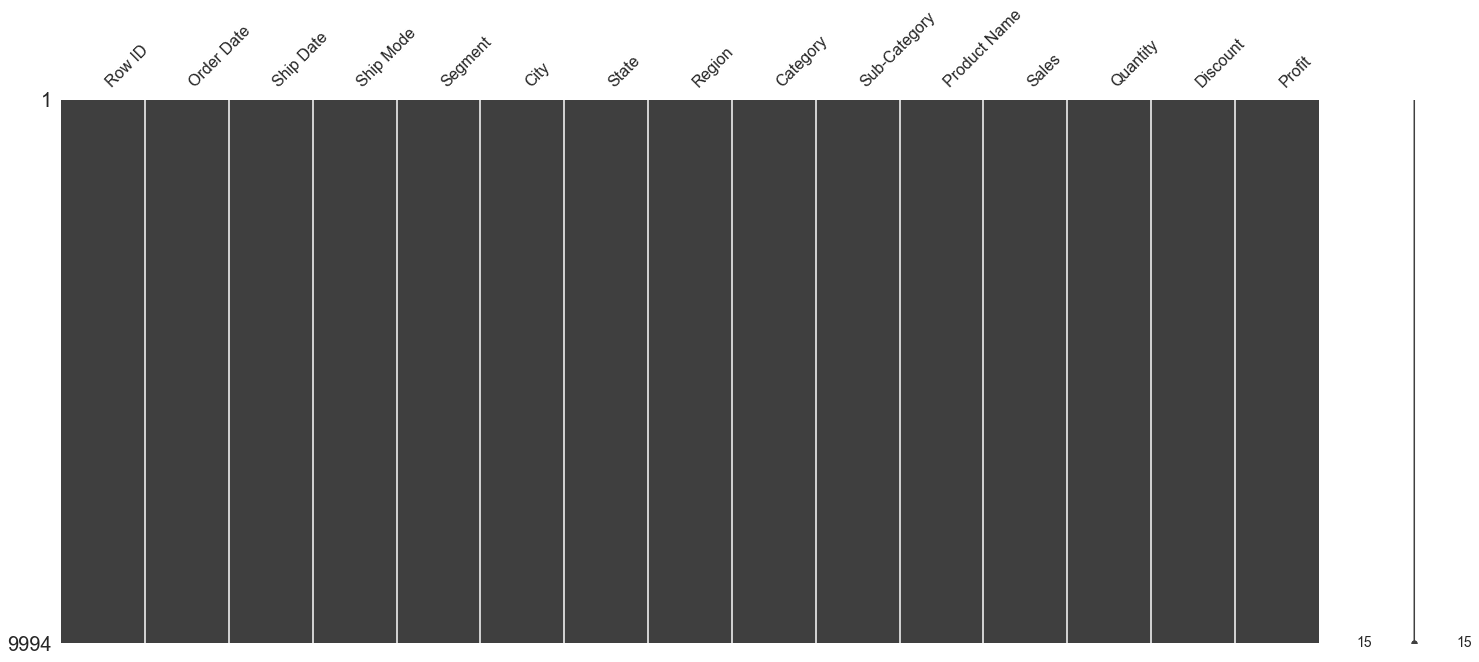

In [404]:
msno.matrix(df)

# Creación de Variables Dummy

### Creación de variables dummy para la variable categorica: Ship Mode

In [405]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [406]:
# Simplificamos las respuestas de la columna Ship Mode
df['Ship Mode'] = df['Ship Mode'].replace(['Standard Class','Second Class','First Class','Same Day'],['Standard','Second','First','Express'])

In [407]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [408]:
# Simplificamos las respuestas de la columna Segment
df['Segment'] = df['Segment'].replace(['Consumer','Corporate','Home Office'],['Consumidor','Corporativo','Oficina'])

### Creamun subset de trabajo para los ejemplos

In [409]:
subset = df[['Ship Mode','Segment','Profit']]
subset.head(5)

,Ship Mode,Segment,Profit
0,Second,Consumidor,41.9136
1,Second,Consumidor,219.5820
2,Second,Corporativo,6.8714
3,Standard,Consumidor,-383.0310
4,Standard,Consumidor,2.5164


### One Hot Encoding

* One Hot Encoding es un proceso mediante el cual se crea una variable dummy por cada categoría de la variable categórica.
* Es decir, si tenemos una variable categórica con 3 categorías, se crearán 3 variables dummy.
* La variable dummy toma el valor de 1 si la observación pertenece a esa categoría, y 0 si no pertenece a esa categoría.
* Es importante eliminar una de las variables dummy creadas, ya que si no se hace, se puede caer en el problema de multicolinealidad.
* Consultar la librería de pandas para crear variables dummy: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* Consultar la librería de sklearn para crear variables dummy: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [410]:
# Desarrollaremos el ejemplo con la columna Ship Mode con la librería Pandas: pandas.get_dummies()

# Se crea una nueva columna para cada valor de la columna Ship Mode
tmp_dummy = pd.get_dummies(subset['Ship Mode'])

tmp_dummy.head(5)

,Express,First,Second,Standard
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [411]:
# Se agrega la columna Ship Mode al dataframe
subset = pd.concat([subset,tmp_dummy],axis=1)

subset.head(5)


,Ship Mode,Segment,Profit,Express,First,Second,Standard
0,Second,Consumidor,41.9136,0,0,1,0
1,Second,Consumidor,219.5820,0,0,1,0
2,Second,Corporativo,6.8714,0,0,1,0
3,Standard,Consumidor,-383.0310,0,0,0,1
4,Standard,Consumidor,2.5164,0,0,0,1


### Para evitar multicolinealidad, debemos dropear la columna de referencia

In [412]:
# Eliminamos la columna Ship Mode
subset = subset.drop(['Ship Mode'],axis=1)
subset.head(5)

,Segment,Profit,Express,First,Second,Standard
0,Consumidor,41.9136,0,0,1,0
1,Consumidor,219.5820,0,0,1,0
2,Corporativo,6.8714,0,0,1,0
3,Consumidor,-383.0310,0,0,0,1
4,Consumidor,2.5164,0,0,0,1


### Desarrollaremos el ejemplo con la columna Segment con la librería Sklearn: sklearn.preprocessing.OneHotEncoder()

In [413]:
# Se importa la librería
from sklearn.preprocessing import OneHotEncoder

In [414]:
subset.Segment.unique()

array(['Consumidor', 'Corporativo', 'Oficina'], dtype=object)

In [415]:
# Se crea el objeto
ohe = OneHotEncoder()

# Se aplica el objeto a la columna Segment
tmp_ohe = pd.DataFrame(ohe.fit_transform(subset[['Segment']]).toarray()) # .astype(int)

# Se agrega el nombre de las columnas
tmp_ohe.columns = ['Consumidor', 'Corporativo', 'Oficina']

tmp_ohe.head(5)


,Consumidor,Corporativo,Oficina
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [416]:
# Se agrega la columna tmp_ohe al dataframe
subset = pd.concat([subset,tmp_ohe],axis=1)
subset.head(5)

,Segment,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina
0,Consumidor,41.9136,0,0,1,0,1.0,0.0,0.0
1,Consumidor,219.5820,0,0,1,0,1.0,0.0,0.0
2,Corporativo,6.8714,0,0,1,0,0.0,1.0,0.0
3,Consumidor,-383.0310,0,0,0,1,1.0,0.0,0.0
4,Consumidor,2.5164,0,0,0,1,1.0,0.0,0.0


In [417]:
# Se eliminan las columnas que no se usarán (drop)
subset = subset.drop(['Segment'],axis=1)
subset.head(5)

,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina
0,41.9136,0,0,1,0,1.0,0.0,0.0
1,219.5820,0,0,1,0,1.0,0.0,0.0
2,6.8714,0,0,1,0,0.0,1.0,0.0
3,-383.0310,0,0,0,1,1.0,0.0,0.0
4,2.5164,0,0,0,1,1.0,0.0,0.0


# Crearemos una variable categorica para clasificar la variable Profit en 2 categorías
* Profit > 0: 1
* Profit <= 0: 0

In [418]:
# Se crea la variable categorica para la columna Profit con las siguientes condiciones
# Profit > 0 : Ganancia
# Profit <= 0 : Perdida

subset['Profit_cat'] = np.where(subset['Profit'] > 0, 'Ganancia', 'Perdida')
subset.head(5)

,Profit,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
0,41.9136,0,0,1,0,1.0,0.0,0.0,Ganancia
1,219.5820,0,0,1,0,1.0,0.0,0.0,Ganancia
2,6.8714,0,0,1,0,0.0,1.0,0.0,Ganancia
3,-383.0310,0,0,0,1,1.0,0.0,0.0,Perdida
4,2.5164,0,0,0,1,1.0,0.0,0.0,Ganancia


In [427]:
# Se dropea la columna Profit para no tenerla duplicada
subset = subset.drop(['Profit'],axis=1)
subset.head(5)

,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
0,0,0,1,0,1.0,0.0,0.0,0
1,0,0,1,0,1.0,0.0,0.0,0
2,0,0,1,0,0.0,1.0,0.0,0
3,0,0,0,1,1.0,0.0,0.0,1
4,0,0,0,1,1.0,0.0,0.0,0


# Label Encoding
* Label Encoding es un proceso mediante el cual se asigna un número a cada categoría de la variable categórica.
* Es decir, si tenemos una variable categórica con 3 categorías, se asignarán los números 1, 2 y 3 a cada categoría.
* Es importante tener en cuenta que no se debe usar Label Encoding cuando se trabaja con algoritmos de Machine Learning basados en distancias, como KNN o K-Means.
* Consultar la librería de pandas para crear variables dummy: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* Consultar la librería de sklearn para crear variables dummy: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [428]:
subset.describe()

,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,0.054333,0.153892,0.194617,0.597158,0.519412,0.302181,0.178407,0.193716
std,0.226684,0.360864,0.395925,0.490494,0.499648,0.459226,0.382874,0.395229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [429]:
# Aplicamos label encoder a la columna Profit_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
subset['Profit_cat'] = le.fit_transform(subset['Profit_cat'])
subset.head(5)

,Express,First,Second,Standard,Consumidor,Corporativo,Oficina,Profit_cat
0,0,0,1,0,1.0,0.0,0.0,0
1,0,0,1,0,1.0,0.0,0.0,0
2,0,0,1,0,0.0,1.0,0.0,0
3,0,0,0,1,1.0,0.0,0.0,1
4,0,0,0,1,1.0,0.0,0.0,0


In [431]:
# Se transforma las columnas a tipo int
subset = subset.astype(int)
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Express      9994 non-null   int64
 1   First        9994 non-null   int64
 2   Second       9994 non-null   int64
 3   Standard     9994 non-null   int64
 4   Consumidor   9994 non-null   int64
 5   Corporativo  9994 non-null   int64
 6   Oficina      9994 non-null   int64
 7   Profit_cat   9994 non-null   int64
dtypes: int64(8)
memory usage: 624.8 KB


# Aplicamos nuestras transformaciones a la data en una regresión logística

In [479]:
# Aplicamos una regresión logistica para predecir el valor de la columna Profit_cat
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score




In [467]:
X = subset.drop('Profit_cat', axis=1)  # Features (todas las columnas excepto la variable objetivo)
y = subset['Profit_cat']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [480]:
# Se crea el objeto
logmodel = LogisticRegression(solver='lbfgs', random_state=0)

# Se entrena el modelo
logmodel.fit(X_train,y_train)

# Se realizan las predicciones
predictions = logmodel.predict(X_test)


In [481]:
# Se imprime el reporte de clasificación
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2452
           1       0.00      0.00      0.00       547

    accuracy                           0.82      2999
   macro avg       0.41      0.50      0.45      2999
weighted avg       0.67      0.82      0.74      2999



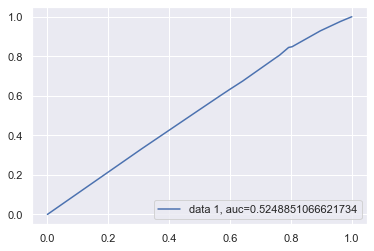

In [482]:
# Se visualizan los resultados a través de un grafico sigmoidal
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
